In [1]:
import nltk

In [2]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [3]:
stop_words = nltk.corpus.stopwords.words('english')
wtk = nltk.tokenize.RegexpTokenizer(r'\w+')
wnl = nltk.stem.wordnet.WordNetLemmatizer()

In [5]:
import pandas as pd

In [6]:
df = pd.read_csv('globalcount_data.csv')

In [7]:
text = df['progress_10_years_tr'].fillna('')

In [ ]:
def normalize_corpus(papers):
    norm_papers = []
    for paper in papers:
        paper = paper.lower()
        #print(paper)
        paper_tokens = [token.strip() for token in wtk.tokenize(paper)]
        paper_tokens = [wnl.lemmatize(token) for token in paper_tokens if not token.isnumeric()]
    #paper_tokens = [token for token in paper_tokens if len(token) > 1]
    paper_tokens = [token for token in paper_tokens if token not in stop_words]
    paper_tokens = list(filter(None, paper_tokens))
    if paper_tokens:
        norm_papers.append(paper_tokens)
    return norm_papers

In [ ]:
n_text = normalize_corpus(text)

# GIVING UP ON Latent Dirichlet Allocation
# Making Random Forests to check variable importance for various issues

In [15]:
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24051 entries, 0 to 24050
Data columns (total 92 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   row_id                                                   24051 non-null  int64  
 1   unique_id                                                24051 non-null  int64  
 2   survey_type                                              24051 non-null  object 
 3   iso3166                                                  24046 non-null  object 
 4   surveydate                                               24051 non-null  object 
 5   city_town                                                24049 non-null  object 
 6   city_town_tr                                             20503 non-null  object 
 7   country_of_residence                                     24050 non-null  object 
 8   gender_not_listed         

In [ ]:
training_set = df.iloc[:,8:34].fillna(value = 0)

In [ ]:
training_set = pd.get_dummies(training_set)

In [ ]:
# garbage code which doesn't work - kill

analysis = df.iloc[:,34:46]
analysis['country'] = df.loc[:,'country_of_residence']
analysis_long = analysis.melt(id_vars = 'country', var_name = 'issue')
analysis_long = pd.concat([df.iloc[:, 8:34], analysis_long], axis = 1)

In [ ]:
# makes more sense
# scratch that, this is still stupid

analysis = df.iloc[:, 8:46]

# the df is already in perfect shape for ML, this makes 0 sense

analysis_long = analysis.melt(id_vars = analysis.columns[:26], var_name = 'issue')

In [ ]:
# why am i doing this?

analysis_long.drop(analysis_long[analysis_long['value'] == 0].index, inplace = True)

In [ ]:
analysis_long.drop(labels = ['value'], axis = 1, inplace = True)

In [ ]:
analysis_long

,gender_not_listed,cisgender_man,cisgender_woman,non_conforming_or_non_binary,gender_choose_not_to_identify,man,transgender_man,transgender_woman,woman,racial_identity_not_listed,...,middle_eastern,native_american,native_hawaiian,north_african,pacific_islander,south_asian,southeast_asian,white,age,issue
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,issue_person_civil_rights_and_freedoms
16,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,issue_person_civil_rights_and_freedoms
23,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,25 to 34,issue_person_civil_rights_and_freedoms
24,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,45 to 54,issue_person_civil_rights_and_freedoms
27,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,35 to 44,issue_person_civil_rights_and_freedoms
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288580,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,45 to 54,issue_person_sexual_reproductive_and_parental_...
288588,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,25 to 34,issue_person_sexual_reproductive_and_parental_...
288601,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,18 to 24,issue_person_sexual_reproductive_and_parental_...
288605,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,25 to 34,issue_person_sexual_reproductive_and_parental_...


In [ ]:
# NAs in age column
# filling it with 0

analysis_long['age'] = analysis_long['age'].fillna(0)

In [ ]:
# subsetting analysis_long to check only civil rights and freedom issue
analysis_long = analysis_long[analysis_long['issue'] == 'issue_person_civil_rights_and_freedoms']

In [ ]:
target = analysis_long['issue']
train_set = pd.get_dummies(analysis_long[[c for c in analysis_long.columns if c != 'issue']])

In [ ]:
train_set

,gender_not_listed,cisgender_man,cisgender_woman,non_conforming_or_non_binary,gender_choose_not_to_identify,man,transgender_man,transgender_woman,woman,racial_identity_not_listed,...,southeast_asian,white,age_0,age_18 to 24,age_25 to 34,age_35 to 44,age_45 to 54,age_55 to 64,age_65 to 74,age_75 or older
8,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
16,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
23,0,0,1,0,0,0,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0
24,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,1,0,0,0
27,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24023,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
24036,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
24043,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0
24044,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0


In [ ]:
clf.fit(train_set, target)

RandomForestClassifier()

In [ ]:
clf=RandomForestClassifier(n_estimators=100)

In [ ]:
feature_imp = pd.Series(clf.feature_importances_, index= train_set.columns).sort_values(ascending=False)

No handles with labels found to put in legend.


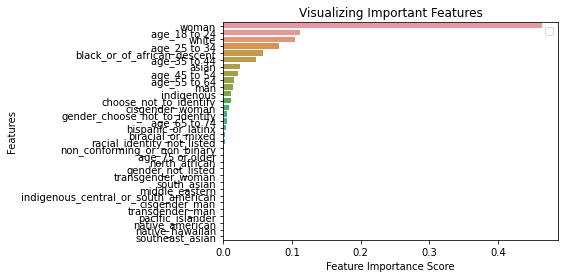

In [ ]:
# this one makes 0 sense honestly

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")


# RESTART

In [19]:
analysis = df.iloc[:, 8:46]
analysis.columns

Index(['gender_not_listed', 'cisgender_man', 'cisgender_woman',
       'non_conforming_or_non_binary', 'gender_choose_not_to_identify', 'man',
       'transgender_man', 'transgender_woman', 'woman',
       'racial_identity_not_listed', 'asian', 'biracial_or_mixed',
       'black_or_of_african_descent', 'hispanic_or_latinx',
       'choose_not_to_identify', 'indigenous',
       'indigenous_central_or_south_american', 'middle_eastern',
       'native_american', 'native_hawaiian', 'north_african',
       'pacific_islander', 'south_asian', 'southeast_asian', 'white', 'age',
       'issue_person_civil_rights_and_freedoms',
       'issue_person_disability_rights',
       'issue_person_economic_and_workers_rights',
       'issue_person_education_and_youth_empowerment',
       'issue_person_ending_violence_harassment_and_abuse',
       'issue_person_environmental_justice',
       'issue_person_immigrant_and_refugee_rights',
       'issue_person_indigenous_andor_roma_rights',
       'issue_pers

In [9]:
analysis.columns[:26]

Index(['gender_not_listed', 'cisgender_man', 'cisgender_woman',
       'non_conforming_or_non_binary', 'gender_choose_not_to_identify', 'man',
       'transgender_man', 'transgender_woman', 'woman',
       'racial_identity_not_listed', 'asian', 'biracial_or_mixed',
       'black_or_of_african_descent', 'hispanic_or_latinx',
       'choose_not_to_identify', 'indigenous',
       'indigenous_central_or_south_american', 'middle_eastern',
       'native_american', 'native_hawaiian', 'north_african',
       'pacific_islander', 'south_asian', 'southeast_asian', 'white', 'age'],
      dtype='object')

In [43]:
demographic_cols = analysis.columns[:26]
target_cols = analysis.columns[27:]

In [75]:
target_cols

Index(['issue_person_disability_rights',
       'issue_person_economic_and_workers_rights',
       'issue_person_education_and_youth_empowerment',
       'issue_person_ending_violence_harassment_and_abuse',
       'issue_person_environmental_justice',
       'issue_person_immigrant_and_refugee_rights',
       'issue_person_indigenous_andor_roma_rights',
       'issue_person_LGBTQI+_rights', 'issue_person_racial_equity',
       'issue_person_reproductive_freedom_and_bodily_autonomy',
       'issue_person_sexual_reproductive_and_parental_health'],
      dtype='object')

In [11]:
analysis.head()

,gender_not_listed,cisgender_man,cisgender_woman,non_conforming_or_non_binary,gender_choose_not_to_identify,man,transgender_man,transgender_woman,woman,racial_identity_not_listed,asian,biracial_or_mixed,black_or_of_african_descent,hispanic_or_latinx,choose_not_to_identify,indigenous,indigenous_central_or_south_american,middle_eastern,native_american,native_hawaiian,north_african,pacific_islander,south_asian,southeast_asian,white,age,issue_person_civil_rights_and_freedoms,issue_person_disability_rights,issue_person_economic_and_workers_rights,issue_person_education_and_youth_empowerment,issue_person_ending_violence_harassment_and_abuse,issue_person_environmental_justice,issue_person_immigrant_and_refugee_rights,issue_person_indigenous_andor_roma_rights,issue_person_LGBTQI+_rights,issue_person_racial_equity,issue_person_reproductive_freedom_and_bodily_autonomy,issue_person_sexual_reproductive_and_parental_health
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,25 to 34,0,1,0,0,0,0,1,0,1,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,25 to 34,0,0,0,0,1,0,0,1,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,1,1,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,45 to 54,0,0,1,0,1,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35 to 44,0,0,1,0,0,0,1,0,1,0,0,0


In [78]:
analysis = pd.get_dummies(analysis)

In [79]:
analysis.columns

Index(['gender_not_listed', 'cisgender_man', 'cisgender_woman',
       'non_conforming_or_non_binary', 'gender_choose_not_to_identify', 'man',
       'transgender_man', 'transgender_woman', 'woman',
       'racial_identity_not_listed', 'asian', 'biracial_or_mixed',
       'black_or_of_african_descent', 'hispanic_or_latinx',
       'choose_not_to_identify', 'indigenous',
       'indigenous_central_or_south_american', 'middle_eastern',
       'native_american', 'native_hawaiian', 'north_african',
       'pacific_islander', 'south_asian', 'southeast_asian', 'white',
       'issue_person_civil_rights_and_freedoms',
       'issue_person_disability_rights',
       'issue_person_economic_and_workers_rights',
       'issue_person_education_and_youth_empowerment',
       'issue_person_ending_violence_harassment_and_abuse',
       'issue_person_environmental_justice',
       'issue_person_immigrant_and_refugee_rights',
       'issue_person_indigenous_andor_roma_rights',
       'issue_person_LGBT

In [13]:
train_set = analysis[[c for c in analysis.columns if c in demographic_cols]]
target = analysis[target_cols[1]]

In [16]:
  clf=RandomForestClassifier(n_estimators=100)

In [17]:
clf.fit(train_set, target)
feature_imp = pd.Series(clf.feature_importances_, index= train_set.columns).sort_values(ascending=False)

In [ ]:
' '.join(target_cols[1].split('_'))

'issue person economic and workers rights'

Text(0.5, 1.0, 'Visualizing Important Features for issue person economic and workers rights')

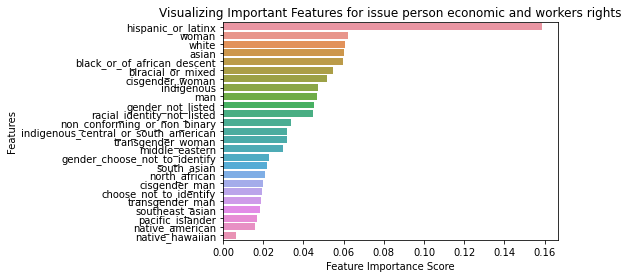

In [ ]:
sns.barplot(x = feature_imp, y = feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features for " + ' '.join(target_cols[1].split('_')))


# Maybe demographics also shapes the perception of which barriers will be faced in overcoming issues?
Analyse barrier chosen

In [25]:
import numpy as np

In [69]:
barrier_analysis = df.iloc[:,np.r_[8:34,46:58]]

In [70]:
demographics = barrier_analysis.columns[:26]
target_barriers = barrier_analysis.columns[26:]

In [72]:
barrier_analysis = pd.get_dummies(barrier_analysis)

In [65]:
train_set_barrier = barrier_analysis[[x for x in barrier_analysis.columns if x in demographics]]
target_set_barrier = barrier_analysis[target_barriers[1]]

In [74]:
target_barriers[1]

'barrier_person_disability_rights'

In [66]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(train_set_barrier,target_set_barrier)

RandomForestClassifier()

In [67]:
feature_importance = pd.Series(rfc.feature_importances_, index = train_set_barrier.columns).sort_values(ascending = False)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Visualizing Important Features for barrier person disability rights')

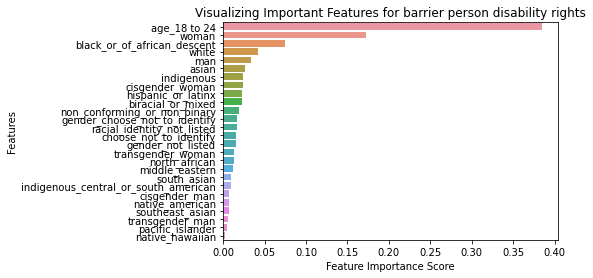

In [83]:
sns.barplot(feature_importance, feature_importance.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features for " + ' '.join(target_barriers[1].split('_')))